# **Task 2: Image Classification**

In [ ]:
# !apt-get install p7zip-full
# !7z x /content/drive/MyDrive/DeepLearningTask-1.7z -o/content/drive/MyDrive/dataset

## **Libraries Importation**

In [ ]:
# Importing necessary libraries for image processing, data manipulation, and machine learning.
import os  # For operating system-dependent functionality
import matplotlib.pyplot as plt  # For plotting data and visualizations
import seaborn as sns  # For enhanced data visualization with a focus on statistical graphics
import cv2  # For computer vision operations
import numpy as np  # For numerical operations and array manipulations
from collections import Counter  # For counting hashable objects
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting datasets into training and test sets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels into integers
from tensorflow.keras.utils import to_categorical  # For converting class vectors to binary class matrices
from tensorflow.keras.models import Sequential  # For creating a Sequential model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, RandomRotation, RandomZoom # For building layers in the neural network
from tensorflow.keras.optimizers import Adam  # For Adam optimizer
from tensorflow.keras.callbacks import ModelCheckpoint  # For implementing callbacks to prevent overfitting and save models
import random # For generating random numbers, useful for tasks like random sampling or setting random seeds

## **Exploratory Data Analysis (EDA) and Preparation**

In [ ]:
# Set paths for Train and Test folders
base_dir = '/content/drive/MyDrive/dataset/DeepLearning 24-25'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

In [ ]:
# Helper function to gather image details
def gather_image_details(folder_path):
    categories = os.listdir(folder_path)
    image_details = []

    for category in categories:
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        image_details.append({
                            "Category": category,
                            "File": img_file,
                            "Shape": img.shape,
                            "Size (KB)": os.path.getsize(img_path) / 1024,
                            "Format": img_file.split('.')[-1].lower()
                        })
                except Exception as e:

                    print(f"Error reading {img_path}: {e}")
    return pd.DataFrame(image_details)

In [ ]:
# Gather details for Train and Test folders
train_details = gather_image_details(train_dir)
test_details = gather_image_details(test_dir)

In [ ]:
# Count images in each category
train_counts = train_details['Category'].value_counts()
test_counts = test_details['Category'].value_counts()

In [ ]:
print("Number of images in each category (Train):\n")
train_counts

Number of images in each category (Train):



Category
Horse       355
Camel       353
Chiken      346
Bear        346
Lion        340
Elephent    337
Squirrel    315
Name: count, dtype: int64

In [ ]:
print("\nNumber of images in each category (Test):\n")
test_counts


Number of images in each category (Test):



Category
CamelTest       10
ChkenTest       10
ElephenTest     10
HorseTest       10
LionTest        10
BearTest        10
SquirrelTest    10
Name: count, dtype: int64

<ipython-input-97-8b4628b249f1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Image Count", data=train_counts_df, palette="viridis")  # Bar plot with 'viridis' color palette
<ipython-input-97-8b4628b249f1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Image Count", data=test_counts_df, palette="magma")  # Bar plot with 'magma' color palette


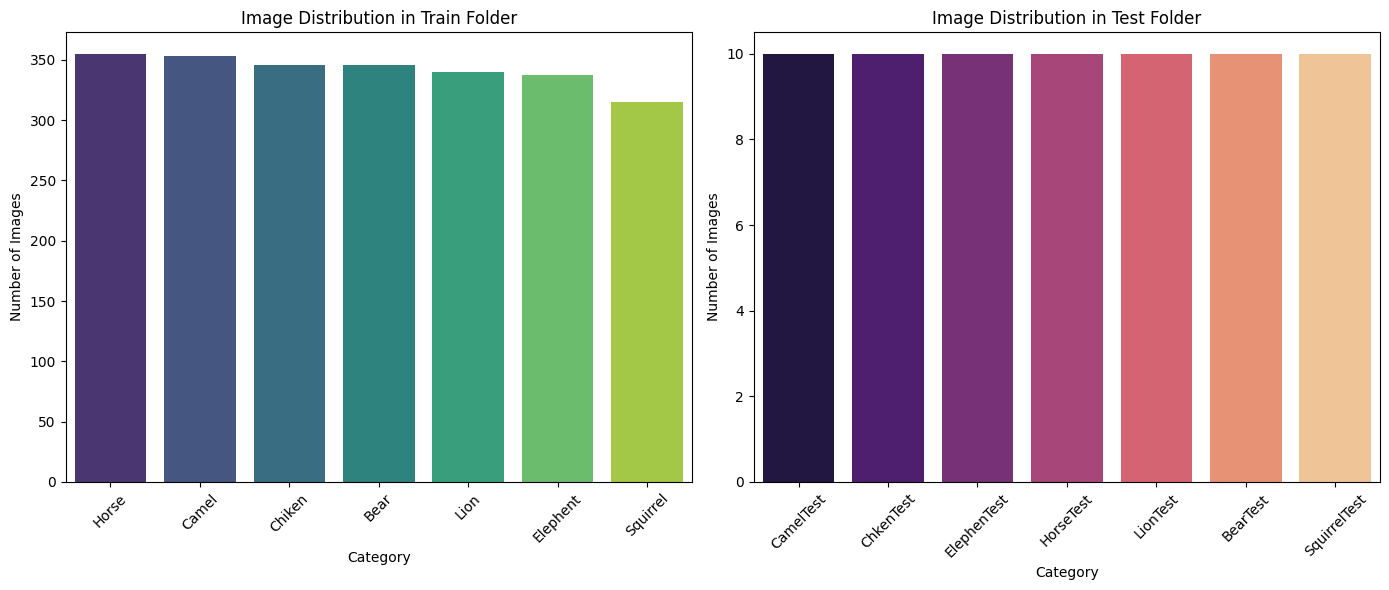

In [ ]:
# Convert the training and testing image count dictionaries into Pandas DataFrames
train_counts_df = pd.DataFrame(list(train_counts.items()), columns=["Category", "Image Count"])
test_counts_df = pd.DataFrame(list(test_counts.items()), columns=["Category", "Image Count"])

# Set up the figure for visualizing image distributions
plt.figure(figsize=(14, 6))

# Plot the image distribution in the training folder
plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns, 1st plot)
sns.barplot(x="Category", y="Image Count", data=train_counts_df, palette="viridis")  # Bar plot with 'viridis' color palette
plt.title("Image Distribution in Train Folder")  # Set the title of the plot
plt.xlabel("Category")  # Label for the x-axis
plt.ylabel("Number of Images")  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot the image distribution in the testing folder
plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, 2nd plot)
sns.barplot(x="Category", y="Image Count", data=test_counts_df, palette="magma")  # Bar plot with 'magma' color palette
plt.title("Image Distribution in Test Folder")  # Set the title of the plot
plt.xlabel("Category")  # Label for the x-axis
plt.ylabel("Number of Images")  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust the layout to ensure plots are displayed neatly
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# Plot a few sample images from each category
def plot_sample_images(folder_path, categories, num_samples=4):
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        category_path = os.path.join(folder_path, category)
        img_files = os.listdir(category_path)[:num_samples]
        for j, img_file in enumerate(img_files):
            img_path = os.path.join(category_path, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(categories), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(category)
    plt.tight_layout()
    plt.show()

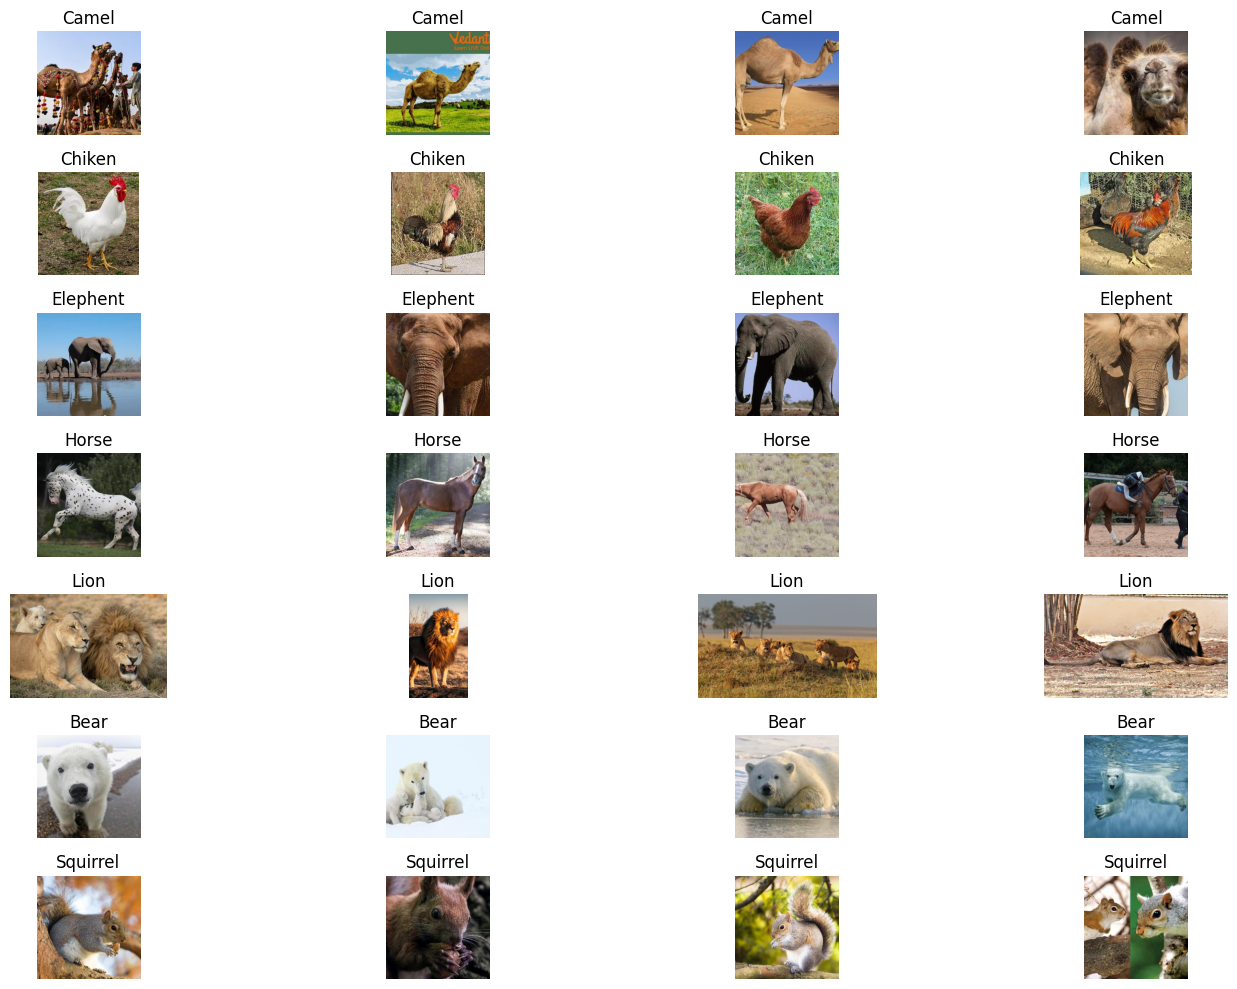

In [ ]:
categories = train_details['Category'].unique()
plot_sample_images(train_dir, categories)

In [ ]:
# Display unique shapes and their counts
train_shapes = train_details['Shape'].value_counts()
test_shapes = test_details['Shape'].value_counts()

In [ ]:
print("Unique shapes and their counts (Train):\n")
train_shapes

Unique shapes and their counts (Train):



Shape
(256, 256, 3)     1280
(768, 1024, 3)     100
(683, 1024, 3)      87
(375, 500, 3)       71
(1024, 683, 3)      35
                  ... 
(1024, 760, 3)       1
(731, 1024, 3)       1
(765, 1024, 3)       1
(1024, 767, 3)       1
(499, 640, 3)        1
Name: count, Length: 438, dtype: int64

In [ ]:
print("\nUnique shapes and their counts (Test):\n")
test_shapes


Unique shapes and their counts (Test):



Shape
(256, 256, 3)      37
(267, 300, 3)       2
(683, 1024, 3)      2
(680, 1024, 3)      2
(500, 406, 3)       1
(1024, 1536, 3)     1
(768, 1024, 3)      1
(1000, 1600, 3)     1
(845, 1400, 3)      1
(900, 1600, 3)      1
(1080, 1920, 3)     1
(1220, 1600, 3)     1
(1200, 1600, 3)     1
(851, 1280, 3)      1
(605, 807, 3)       1
(334, 500, 3)       1
(300, 194, 3)       1
(225, 300, 3)       1
(600, 800, 3)       1
(256, 300, 3)       1
(287, 300, 3)       1
(1024, 683, 3)      1
(1023, 1024, 3)     1
(1024, 1021, 3)     1
(280, 300, 3)       1
(300, 291, 3)       1
(300, 300, 3)       1
(467, 400, 3)       1
(500, 500, 3)       1
(375, 500, 3)       1
(925, 1024, 3)      1
Name: count, dtype: int64

In [ ]:
# File formats and sizes
train_formats = train_details['Format'].value_counts()
test_formats = test_details['Format'].value_counts()

print("File formats (Train):\n", train_formats)
print("\nFile formats (Test):\n", test_formats)

File formats (Train):
 Format
jpg     2179
jpeg     213
Name: count, dtype: int64

File formats (Test):
 Format
jpg     61
jpeg     9
Name: count, dtype: int64


In [ ]:
# Average file size by category
train_sizes = train_details.groupby('Category')['Size (KB)'].mean()
test_sizes = test_details.groupby('Category')['Size (KB)'].mean()

print("\nAverage file size by category (Train):\n", train_sizes)
print("\nAverage file size by category (Test):\n", test_sizes)


Average file size by category (Train):
 Category
Bear         10.162544
Camel        41.491521
Chiken      137.083270
Elephent     14.536327
Horse       130.930524
Lion        186.480874
Squirrel     13.290262
Name: Size (KB), dtype: float64

Average file size by category (Test):
 Category
BearTest          9.295605
CamelTest        49.876270
ChkenTest       136.493262
ElephenTest      13.501660
HorseTest       115.313281
LionTest        356.721680
SquirrelTest     13.660352
Name: Size (KB), dtype: float64


## **Data Preprocessing and Augmentation**

In [ ]:
# Encode categories as numbers
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
train_details['Encoded Category'] = label_encoder1.fit_transform(train_details['Category'])
test_details['Encoded Category'] = label_encoder2.fit_transform(test_details['Category'])
# Display the mapping
category_mapping1 = dict(zip(label_encoder1.classes_, label_encoder1.transform(label_encoder1.classes_)))
category_mapping2 = dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_)))
print("Train Category to Number Mapping:", category_mapping1)
print("Test Category to Number Mapping:", category_mapping2)

Train Category to Number Mapping: {'Bear': 0, 'Camel': 1, 'Chiken': 2, 'Elephent': 3, 'Horse': 4, 'Lion': 5, 'Squirrel': 6}
Test Category to Number Mapping: {'BearTest': 0, 'CamelTest': 1, 'ChkenTest': 2, 'ElephenTest': 3, 'HorseTest': 4, 'LionTest': 5, 'SquirrelTest': 6}


In [ ]:
# Normalize image pixels to the range [0, 1]
def load_and_normalize_images(image_details, folder_path, size=(150, 150)):
    images = []
    labels = []
    for _, row in image_details.iterrows():
        img_path = os.path.join(folder_path, row['Category'], row['File'])
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, size)  # Resize image
            img = img / 255.0  # Normalize pixels
            images.append(img)
            labels.append(row['Encoded Category'])
    return np.array(images), np.array(labels)

In [ ]:
# Load and preprocess images
X, y = load_and_normalize_images(train_details, train_dir)
print("Shape of images after preprocessing:", X.shape)

Shape of images after preprocessing: (2392, 150, 150, 3)


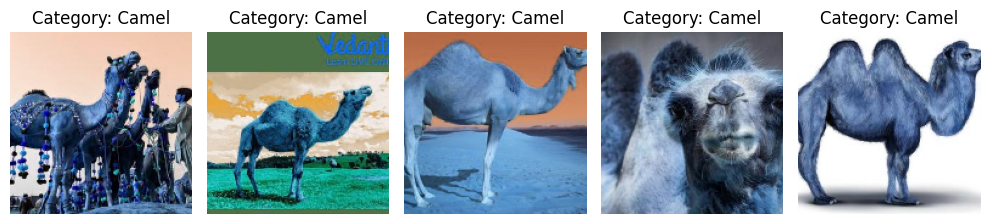

In [ ]:
# Verify resizing and normalization by displaying a few images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i])
    plt.title(f"Category: {label_encoder1.inverse_transform([y[i]])[0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Split data into training (70%), validation (20%), and testing (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

In [ ]:
# Display dataset info
print(f"Training Set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Set: {X_val.shape}, Labels: {y_val.shape}")
print(f"Testing Set: {X_test.shape}, Labels: {y_test.shape}")

Training Set: (49, 150, 150, 3), Labels: (49, 7, 7)
Validation Set: (14, 150, 150, 3), Labels: (14, 7, 7)
Testing Set: (7, 150, 150, 3), Labels: (7, 7, 7)


In [ ]:
# One-hot encode the labels
num_classes = len(category_mapping1)  # Number of classes (7 in this case)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)  # Optional, for later testing

print("Shape of y_train after one-hot encoding:", y_train.shape)
print("Shape of y_val after one-hot encoding:", y_val.shape)

Shape of y_train after one-hot encoding: (49, 7, 7, 7)
Shape of y_val after one-hot encoding: (14, 7, 7, 7)


In [ ]:
def display_set_info(labels, set_name):
    # Convert one-hot encoded labels back to original category numbers
    if labels.ndim > 1:  # Check if labels are one-hot encoded (2D array)
        labels = np.argmax(labels, axis=1)  # Get the index of the maximum value (category)

    # Convert NumPy array to a list of hashable items
    labels = labels.tolist()  # This line converts NumPy array to list

    label_counts = Counter(labels)  # Counter can now work with the list
    print(f"{set_name} - Number of images per category:")
    for category, count in label_counts.items():
        print(f"  {label_encoder1.inverse_transform([category])[0]}: {count}")

In [ ]:
display_set_info(y_train, "Training Set")

Training Set - Number of images per category:
  Camel: 28
  Bear: 2303
  Lion: 14
  Squirrel: 14
  Chiken: 14
  Elephent: 14
  Horse: 14


In [ ]:
display_set_info(y_val, "Validation Set")

Validation Set - Number of images per category:
  Bear: 69
  Chiken: 69
  Camel: 71
  Squirrel: 63
  Lion: 68
  Elephent: 67
  Horse: 71


In [ ]:
display_set_info(y_test, "Testing Set")

Testing Set - Number of images per category:
  Lion: 34
  Bear: 35
  Horse: 36
  Camel: 35
  Elephent: 34
  Squirrel: 31
  Chiken: 35


## **Model Design and Training**

In [ ]:
# Define the CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])


# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Optimizer
    loss='categorical_crossentropy',     # Loss function for multi-class classification
    metrics=['accuracy']                 # Evaluation metric
)

# Print model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation_6 (RandomRotation)   │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_6 (RandomZoom)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,330,183 (20.33 MB)

 Trainable params: 5,330,183 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Create a directory for model checkpoints
checkpoint_dir = "checkpoints"  # Folder where the best models will be stored
os.makedirs(checkpoint_dir, exist_ok=True)  # Ensure the directory exists

# Define the file path to save the best model
checkpoint_path = os.path.join(checkpoint_dir, f"best_model.keras")

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,  # Path to save the model
    monitor='val_accuracy',       # Metric to monitor for improvements
    save_best_only=True,      # Save the model only if val_loss improves
    verbose=1                 # Print a message when the model is saved
)

In [ ]:
# Define batch size
batch_size = 32

# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    validation_data=(X_val, y_val),  # Validation data
    epochs=10,  # Set the number of epochs
    batch_size=batch_size,  # Batch size
    callbacks=[checkpoint],  # Callbacks for early stopping and checkpointing
    verbose=1  # Display training progress
)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1825 - loss: 2.2569
Epoch 1: val_accuracy improved from -inf to 0.23640, saving model to checkpoints/best_model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.1832 - loss: 2.2522 - val_accuracy: 0.2364 - val_loss: 1.8416
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2819 - loss: 1.7877
Epoch 2: val_accuracy improved from 0.23640 to 0.40167, saving model to checkpoints/best_model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2821 - loss: 1.7874 - val_accuracy: 0.4017 - val_loss: 1.6552
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3671 - loss: 1.6793
Epoch 3: val_accuracy did not improve from 0.40167
53/53 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3670 - loss: 1.6792 - val_accuracy: 0.4017 - val_loss: 1.6087
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3970 - loss: 1.5932
Epoch 4: val_accuracy improved from 0.40167 to 0.42469, saving model to c

In [ ]:
model.save("/content/drive/MyDrive/Best_Model.keras")

## **Evaluation and Testing**

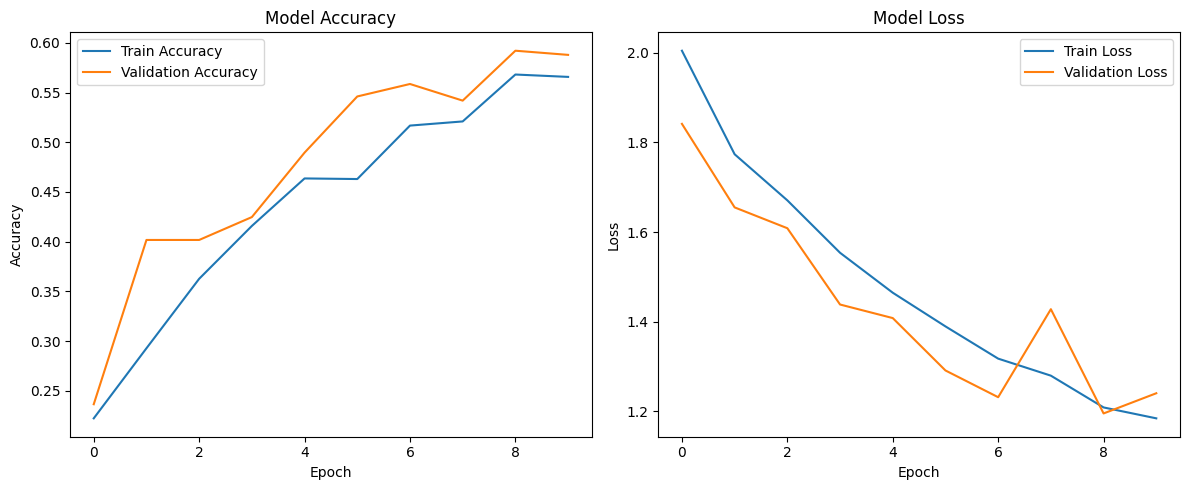

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Testing Set Loss: {test_loss:.4f}")
print(f"Testing Set Accuracy: {test_accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.5926 - loss: 1.2633
Testing Set Loss: 1.2996
Testing Set Accuracy: 0.5708


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step


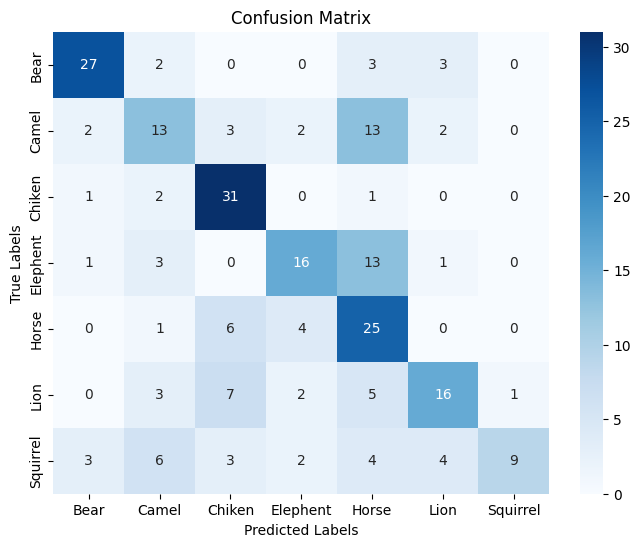

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder1.classes_, yticklabels=label_encoder1.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=label_encoder1.classes_)

# Print the report
print(report)

              precision    recall  f1-score   support

        Bear       0.79      0.77      0.78        35
       Camel       0.43      0.37      0.40        35
      Chiken       0.62      0.89      0.73        35
    Elephent       0.62      0.47      0.53        34
       Horse       0.39      0.69      0.50        36
        Lion       0.62      0.47      0.53        34
    Squirrel       0.90      0.29      0.44        31

    accuracy                           0.57       240
   macro avg       0.62      0.56      0.56       240
weighted avg       0.62      0.57      0.56       240



8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step


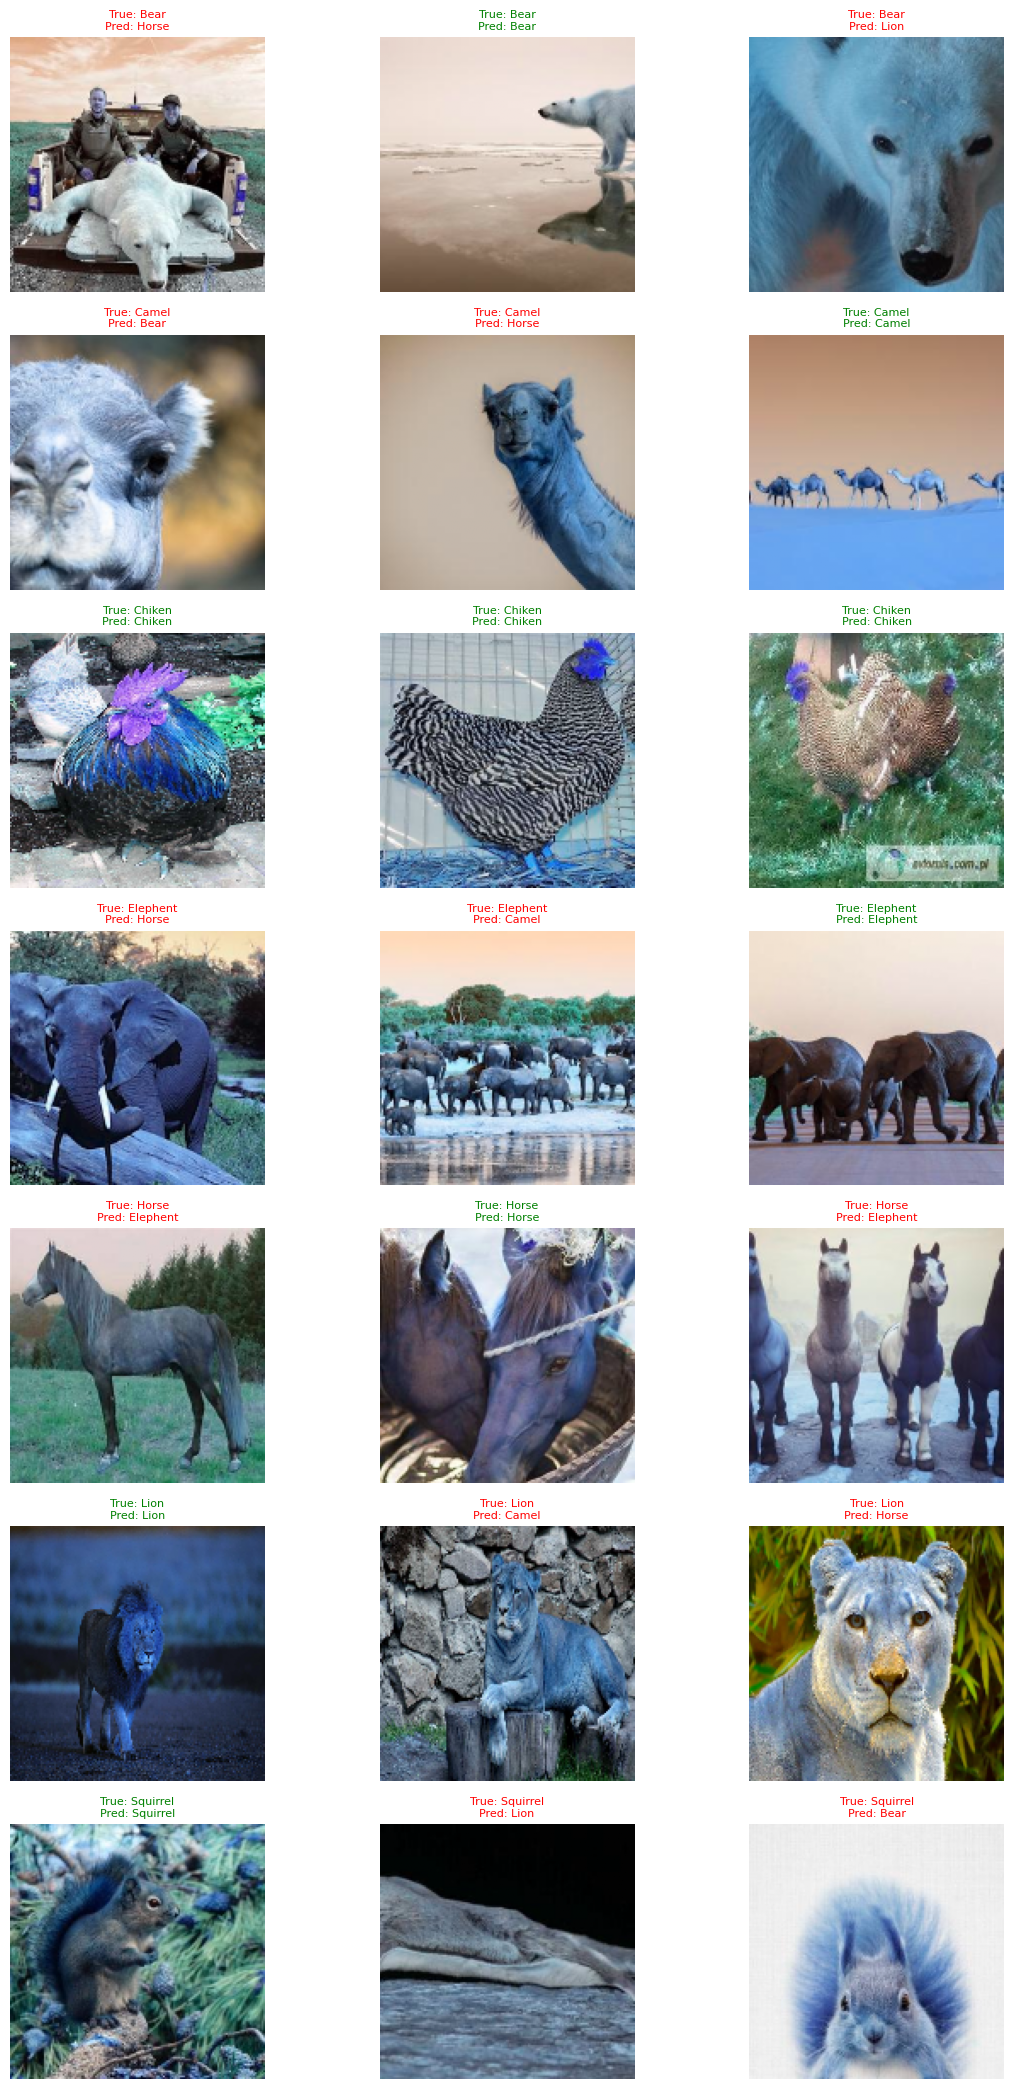

In [ ]:
def plot_images_with_predictions(X_test, y_test, predictions, label_encoder):
    categories = label_encoder.classes_
    num_images_per_category = 3  # Number of images per category to display

    # Define the size of each subplot
    figsize = (12, len(categories) * 3)
    plt.figure(figsize=figsize)

    for i, category in enumerate(categories):
        # Find indices of images belonging to the current category
        category_indices = np.where(np.argmax(y_test, axis=1) == label_encoder.transform([category])[0])[0]

        # Randomly select images from the category
        selected_indices = random.sample(list(category_indices), min(num_images_per_category, len(category_indices)))

        for j, index in enumerate(selected_indices):
            # Determine subplot position
            plt.subplot(len(categories), num_images_per_category, i * num_images_per_category + j + 1)

            # Display the image
            plt.imshow(X_test[index])
            plt.axis('off')

            # Get true and predicted labels
            true_label = label_encoder.inverse_transform([np.argmax(y_test[index])])[0]
            predicted_label = label_encoder.inverse_transform([np.argmax(predictions[index])])[0]

            # Set title with color coding
            color = 'green' if true_label == predicted_label else 'red'
            plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=8, color=color)

    # Adjust spacing between plots
    plt.tight_layout()
    plt.show()

# Call the function with predictions
predictions = model.predict(X_test)
plot_images_with_predictions(X_test, y_test, predictions, label_encoder1)


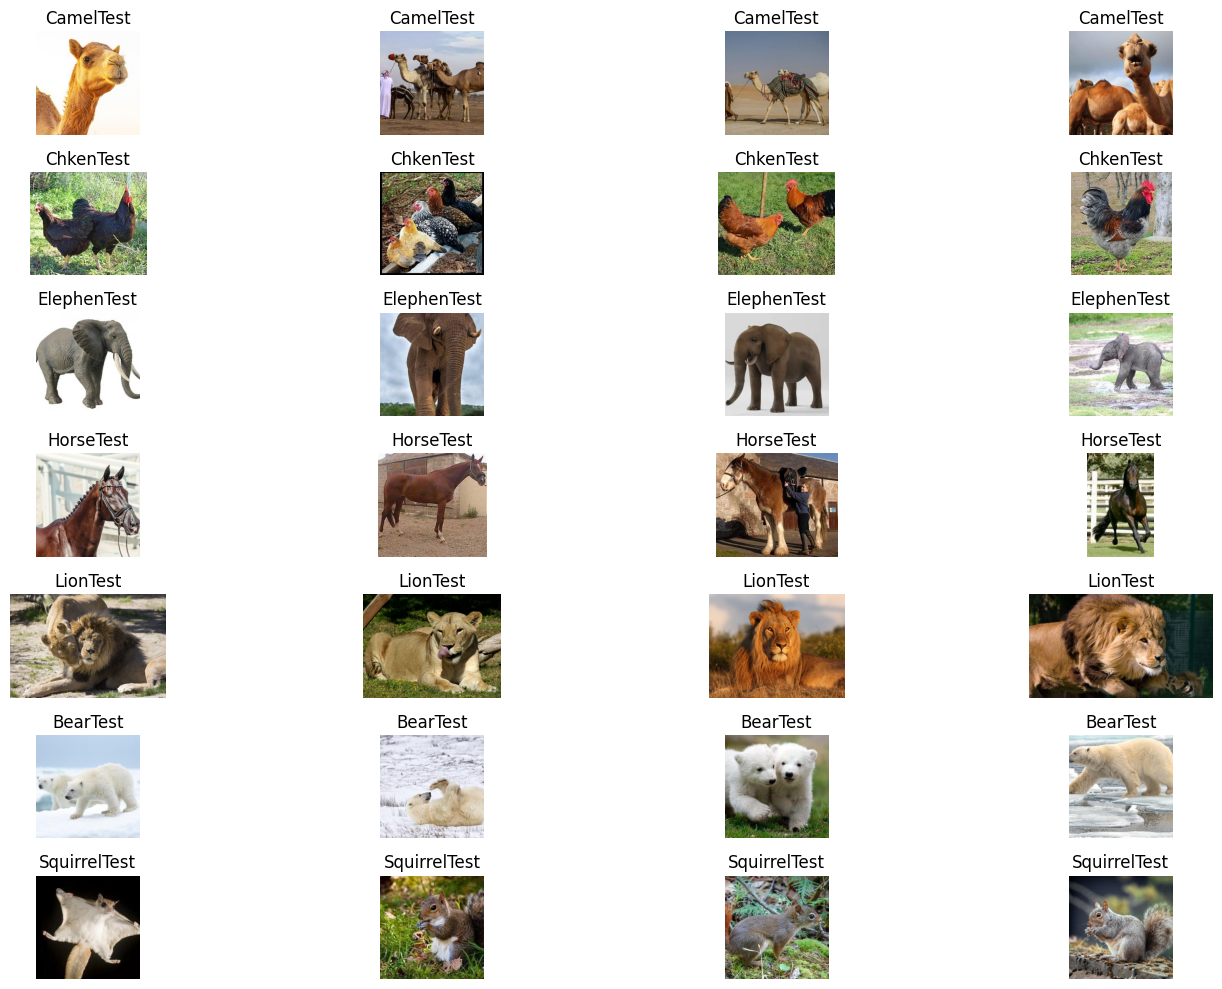

In [ ]:
categories = test_details['Category'].unique()
plot_sample_images(test_dir, categories)

In [ ]:
# Load and preprocess test images
X, y = load_and_normalize_images(test_details, test_dir)
print("Shape of test images after preprocessing:", X.shape)

Shape of test images after preprocessing: (70, 150, 150, 3)


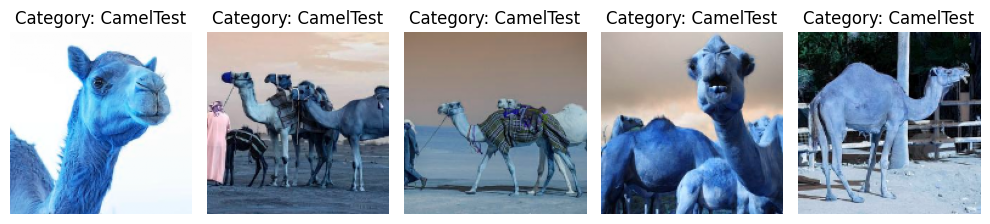

In [ ]:
# Verify resizing and normalization by displaying a few images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i])
    plt.title(f"Category: {label_encoder2.inverse_transform([y[i]])[0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step


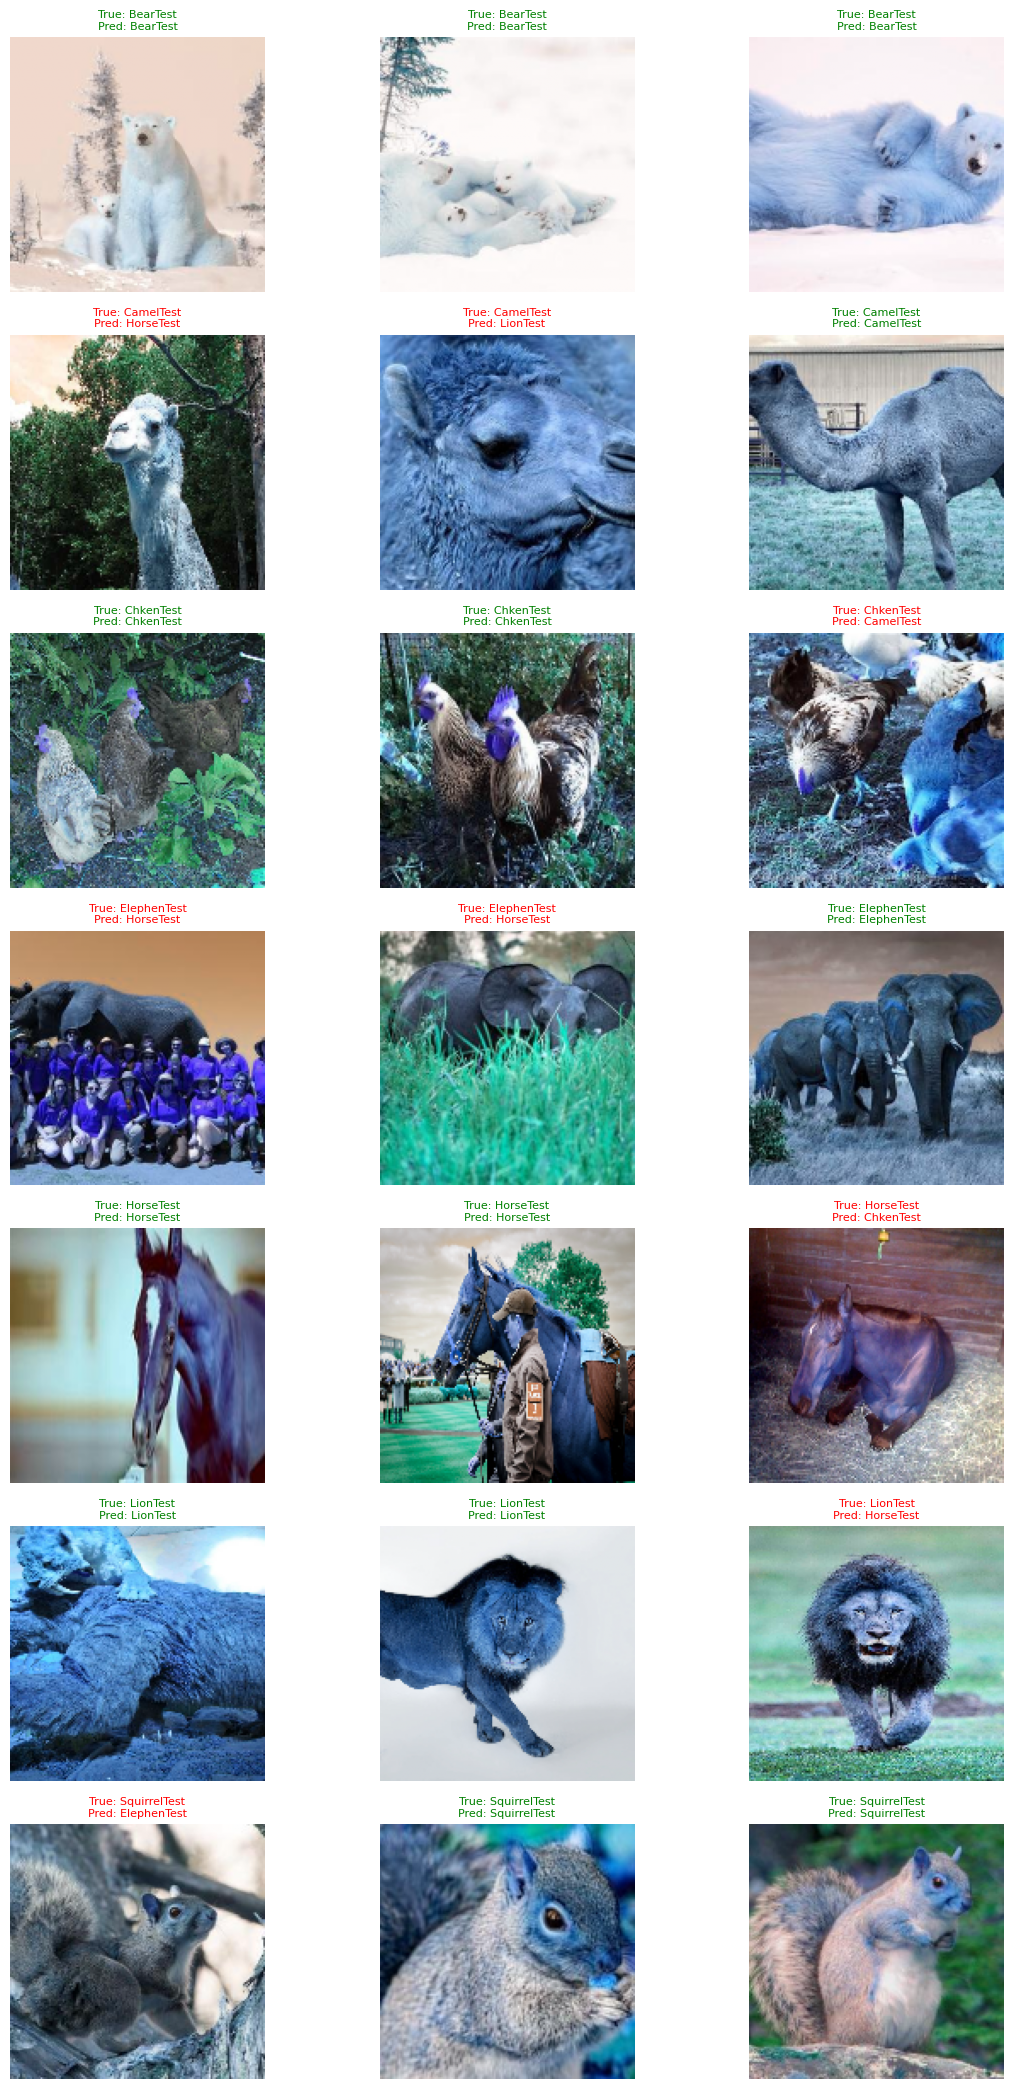

In [ ]:
def plot_images_with_predictions(X_test, y_test, predictions, label_encoder):
    import matplotlib.pyplot as plt

    categories = label_encoder.classes_
    num_images_per_category = 3  # Number of images per category to display

    # Adjusting figure size based on the number of categories
    figsize = (12, 3 * len(categories))
    plt.figure(figsize=figsize)

    for i, category in enumerate(categories):
        # Find indices of images belonging to the current category
        category_indices = np.where(np.argmax(y_test, axis=1) == label_encoder.transform([category])[0])[0]

        # Randomly select 3 images from the category
        selected_indices = random.sample(list(category_indices), min(num_images_per_category, len(category_indices)))

        for j, index in enumerate(selected_indices):
            # Calculate subplot position
            plt.subplot(len(categories), num_images_per_category, i * num_images_per_category + j + 1)

            # Display the image
            plt.imshow(X_test[index])
            plt.axis('off')

            # Get the true and predicted labels
            true_label = label_encoder.inverse_transform([np.argmax(y_test[index])])[0]
            predicted_label = label_encoder.inverse_transform([np.argmax(predictions[index])])[0]

            # Set the title with color-coded labels
            color = 'green' if true_label == predicted_label else 'red'
            plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=8, color=color)

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

# Call the function with predictions
predictions = model.predict(X_test)
plot_images_with_predictions(X_test, y_test, predictions, label_encoder2)


Shape of test images after preprocessing: (70, 150, 150, 3)
Shape of test labels after one-hot encoding: (70, 7)
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 434ms/step


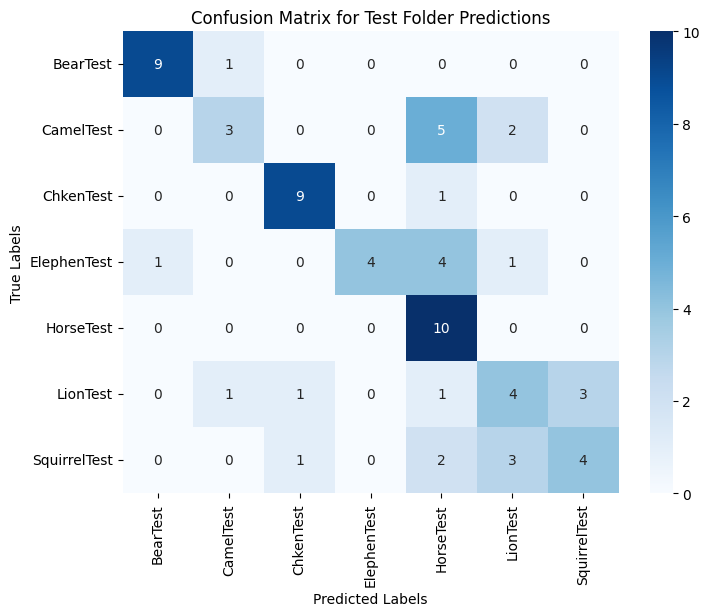

In [ ]:
# Load and preprocess test images, ensuring 'y' has the correct shape
X, y = load_and_normalize_images(test_details, test_dir)
y = to_categorical(y, num_classes=7)  # One-hot encode 'y'

print("Shape of test images after preprocessing:", X.shape)
print("Shape of test labels after one-hot encoding:", y.shape)

# Make predictions on the Test folder images
test_folder_predictions = model.predict(X)
test_folder_pred_classes = np.argmax(test_folder_predictions, axis=1)
test_folder_true_classes = np.argmax(y, axis=1) # Now this should work correctly

# Compute the confusion matrix for Test folder images
test_folder_conf_matrix = confusion_matrix(test_folder_true_classes, test_folder_pred_classes)

# Plot the confusion matrix for Test folder images
plt.figure(figsize=(8, 6))
sns.heatmap(test_folder_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder2.classes_, yticklabels=label_encoder2.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Folder Predictions')
plt.show()

In [ ]:
# Generate the classification report
report = classification_report(test_folder_true_classes, test_folder_pred_classes, target_names=label_encoder2.classes_)

# Print the report
print(report)

              precision    recall  f1-score   support

    BearTest       0.90      0.90      0.90        10
   CamelTest       0.60      0.30      0.40        10
   ChkenTest       0.82      0.90      0.86        10
 ElephenTest       1.00      0.40      0.57        10
   HorseTest       0.43      1.00      0.61        10
    LionTest       0.40      0.40      0.40        10
SquirrelTest       0.57      0.40      0.47        10

    accuracy                           0.61        70
   macro avg       0.67      0.61      0.60        70
weighted avg       0.67      0.61      0.60        70

